In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

In [3]:
#read the data
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#check data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#Use LabelEncoder to convert the column y into numbers(yes to 1, no to 0)
le = LabelEncoder()
df['y']=le.fit_transform(df['y'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

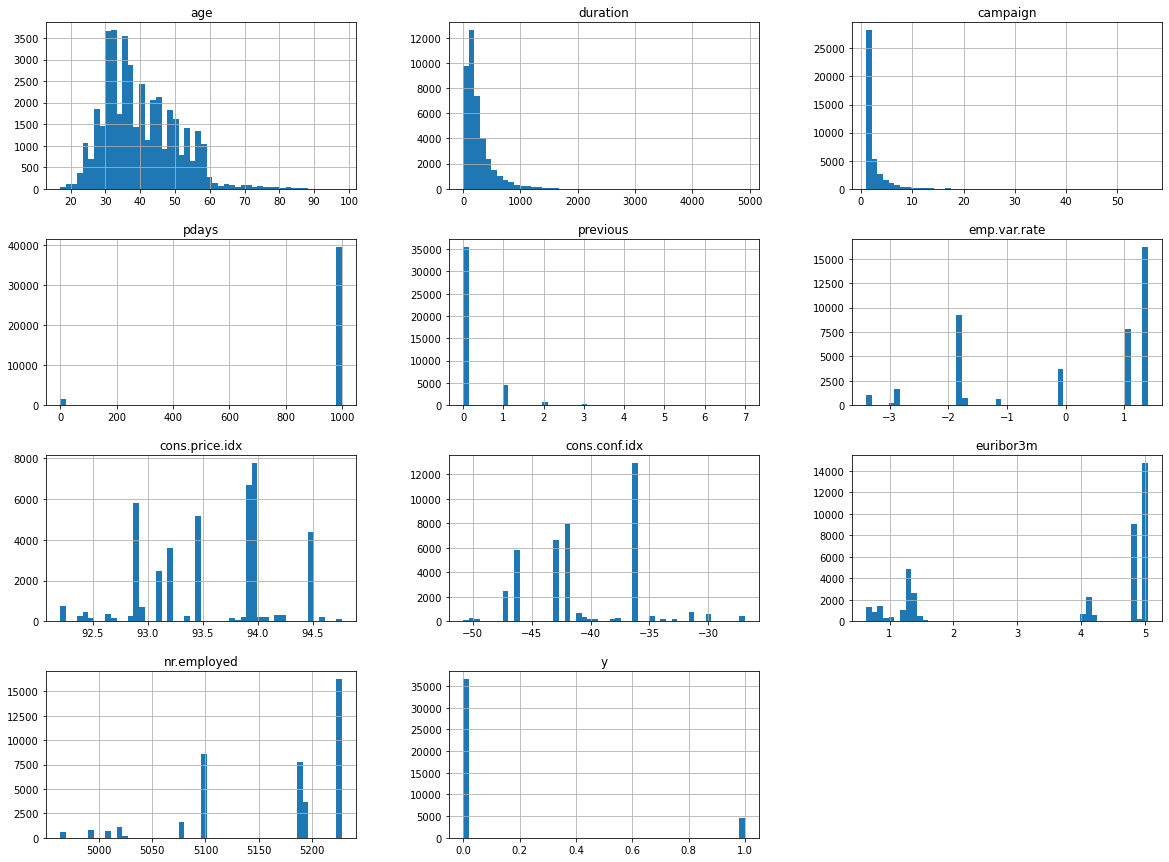

In [8]:
# check the distrubution in the numerical columns
_ = df.hist(bins=50, figsize=(20,15))

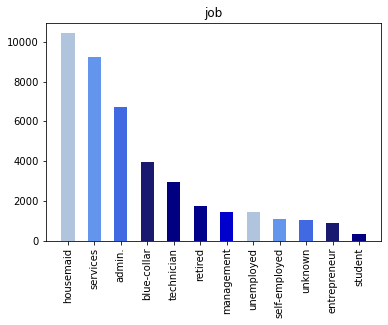

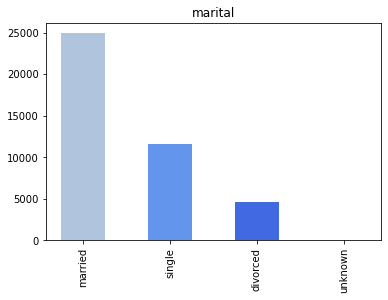

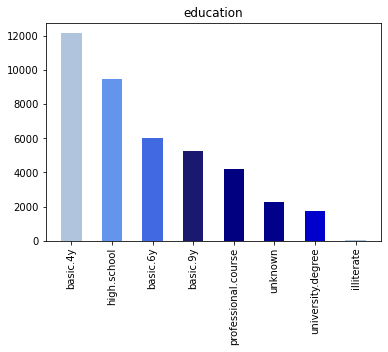

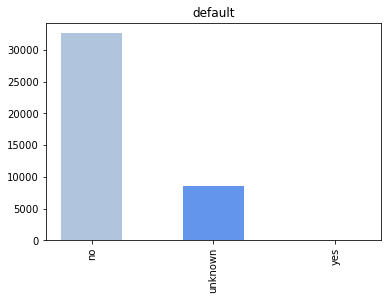

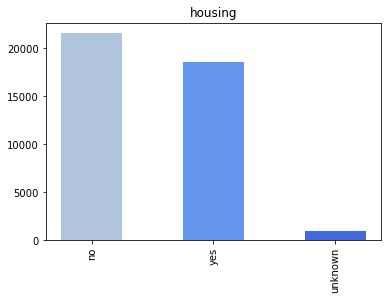

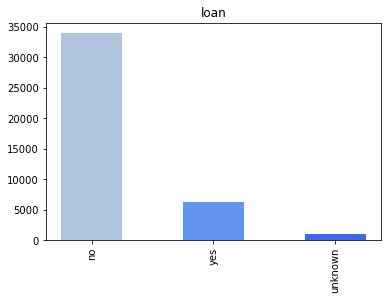

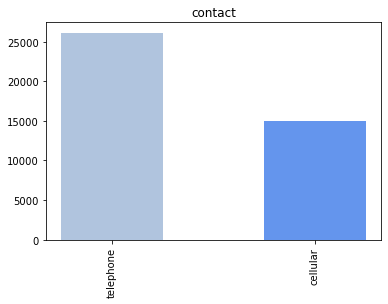

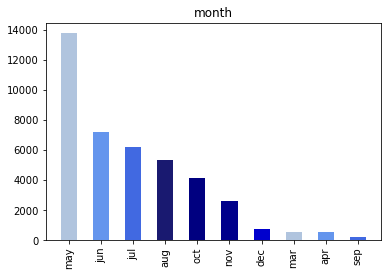

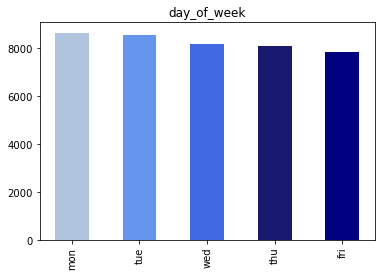

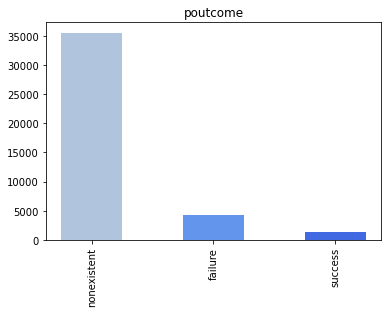

In [8]:
#check the distrubution in each object columns

#job
plt.bar(df.job.unique(),
        df.job.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('job')
plt.show()
#marital
plt.bar(df.marital.unique(),
        df.marital.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('marital')
plt.show()
#education
plt.bar(df.education.unique(),
        df.education.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('education')
plt.show()

#default
plt.bar(df.default.unique(),
        df.default.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('default')
plt.show()

#housing
plt.bar(df.housing.unique(),
        df.housing.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('housing')
plt.show()
#loan
plt.bar(df.loan.unique(),
        df.loan.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('loan')
plt.show()

#contact
plt.bar(df.contact.unique(),
        df.contact.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('contact')
plt.show()
#month
plt.bar(df.month.unique(),
        df.month.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('month')
plt.show()
#day_of_week
plt.bar(df.day_of_week.unique(),
        df.day_of_week.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('day_of_week')
plt.show()
#poutcome
plt.bar(df.poutcome.unique(),
        df.poutcome.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.title('poutcome')
plt.show()

In [9]:
#select numerical features
numerical_features = df.select_dtypes(exclude="object").columns.tolist()

In [10]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

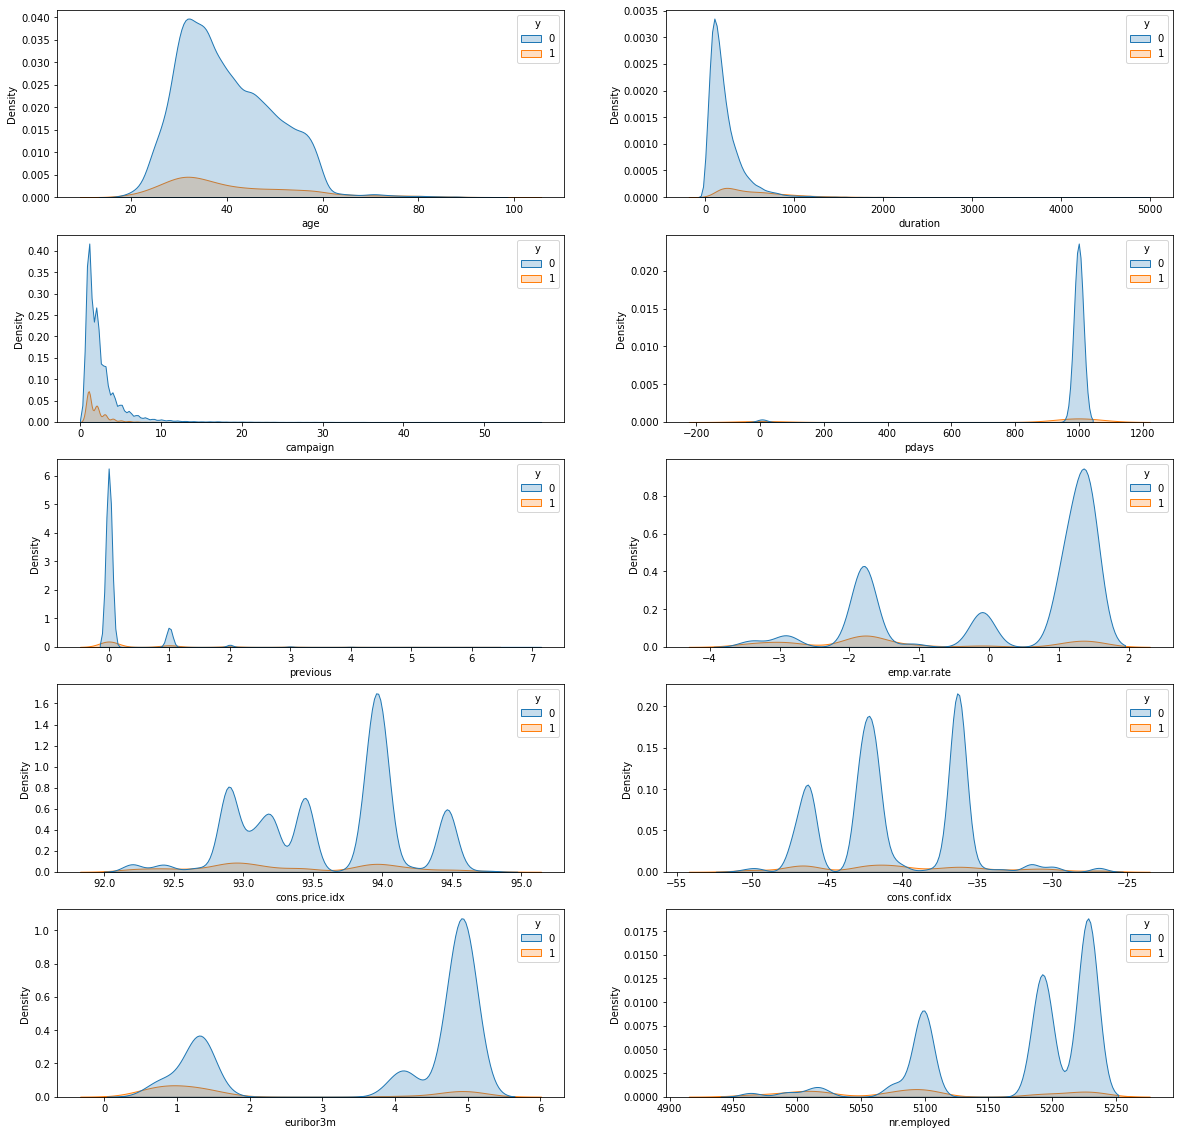

In [11]:
#plot the numerical features relate to the target
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(20,20))

for i in range(5):
    for j in range(2):
        sns.kdeplot(x=numerical_features[2*i+j],data=df,hue="y",fill=True,ax=ax[i,j])

In [12]:
# analyse_feature code from ALEX KATAEV(kaggle)
def plot_yes_proportion(df_=None, feature_name=None, feature_type=None, num_gr=10, plot_options={}):

    if 'fig' not in plot_options.keys():
        fig, ax = plt.subplots(figsize=(15, 3))
    else:
        fig = plot_options['fig']
        ax = plot_options['ax']
        
    if feature_type == 'categorical':
        
        if feature_name != 'month':
            custom_order = pd.Categorical(df_[feature_name].value_counts(ascending=False).index,
                                          ordered=True)

        sns.barplot(x=df_[feature_name], 
                    y=df_['y'],
                    order=custom_order,
                    ci=95,
                    errwidth=2,
                    ax=ax);

        # Bar labels
        df_yes_proba = pd.crosstab(df_[feature_name], df_['y'])
        df_yes_proba = (df_yes_proba[1] / (df_yes_proba[0] + df_yes_proba[1])).reindex(custom_order)

        coors_x = np.arange(0, df_yes_proba.shape[0])
        for i in range(df_yes_proba.shape[0]):
            plt.annotate(f"{df_yes_proba[i]:.2f}", 
                         xy=(coors_x[i]-0.2, df_yes_proba[i]), 
                         ha='center', va='bottom')

        # Titles and labels
        ax.set_title('YES-proportion', fontsize=16, pad=20)
        ax.set_ylabel('Proportion')

        if 'fig' not in plot_options.keys():
            plt.tight_layout()
 

In [13]:
def analyse_feature(df_, feature_name, feature_type, num_gr=10):
    
    
    if feature_type == 'categorical':

        fig, axes = plt.subplots(2,1, 
                                 figsize=(15, 6), 
                                 gridspec_kw={'height_ratios': [3, 2]}, 
                                 sharex=True)
        # Subplot 2 (Probability to say `yes`)
        plot_yes_proportion(df_=df_, feature_name=feature_name, feature_type=feature_type,
                            plot_options={'fig':fig, 'ax':axes[1]})
        
        plt.tight_layout()


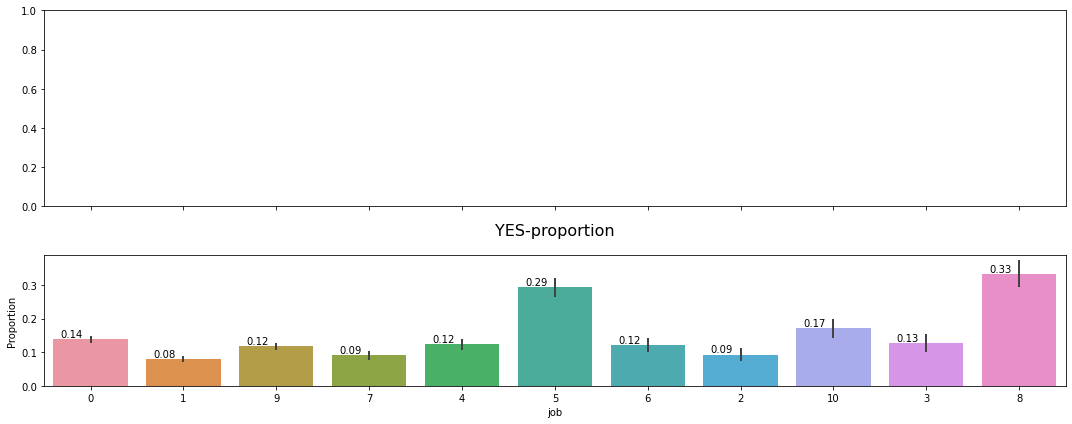

In [51]:
analyse_feature(df_=df, feature_name='job', feature_type='categorical')

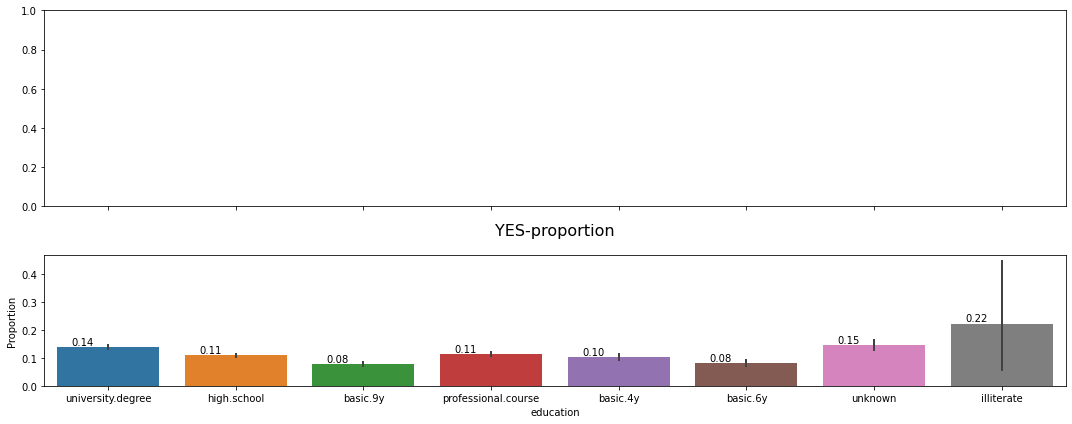

In [15]:
analyse_feature(df_=df, feature_name='education', feature_type='categorical')

In [9]:
#drop the feature cause the data leakage
df = df.drop('duration', axis=1)

In [10]:
# replace unknown to NAN
df = df.replace('unknown', np.nan)
#drop the row which contain the missing data
df = df.dropna()
#reset the index
df = df.reset_index(drop = True)

In [11]:
#check
df['housing'].value_counts()

yes    16521
no     13967
Name: housing, dtype: int64

In [12]:
#transfer the object to number
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0
1,20,7,1,3,0,1,0,1,6,1,0,25,0,1,8,18,16,285,8,0
2,23,0,1,1,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0
3,39,7,1,3,0,0,1,1,6,1,0,25,0,1,8,18,16,285,8,0
4,42,0,1,5,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0


In [13]:
#correlation from data
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.005454,-0.401122,-0.129622,0.003172,0.004680,-0.010941,-0.011940,-0.010331,-0.013449,-0.002394,-0.053506,0.049216,0.010767,-0.045738,-0.042451,0.126376,-0.095750,-0.069722,0.048743
job,-0.005454,1.000000,0.019123,0.104364,0.015423,0.005599,-0.018978,-0.029618,-0.036197,-0.002137,-0.007112,-0.020225,0.012920,0.010156,0.000207,-0.018028,0.046818,-0.016201,-0.012952,0.020540
marital,-0.401122,0.019123,1.000000,0.112834,-0.003073,0.008898,0.003601,-0.059260,-0.022090,0.005922,-0.005610,-0.026990,0.028645,0.002132,-0.069576,-0.048480,-0.032153,-0.062353,-0.065725,0.037563
education,-0.129622,0.104364,0.112834,1.000000,0.002447,0.020265,0.009288,-0.095676,-0.090510,-0.014948,0.008478,-0.029968,0.016188,0.023101,0.007969,-0.062519,0.090914,-0.017355,0.000583,0.040804
default,0.003172,0.015423,-0.003073,0.002447,1.000000,-0.004152,-0.004271,-0.006954,-0.005200,0.006985,-0.004342,0.002060,0.002639,-0.006697,0.006897,-0.002413,0.005575,0.006181,0.007776,-0.003776
housing,0.004680,0.005599,0.008898,0.020265,-0.004152,1.000000,0.046994,-0.080567,-0.013312,0.000415,-0.011252,-0.008987,0.021081,-0.013034,-0.054982,-0.075160,-0.031149,-0.039533,-0.035536,0.010071
loan,-0.010941,-0.018978,0.003601,0.009288,-0.004271,0.046994,1.000000,-0.009017,-0.003385,-0.009594,0.006558,0.002875,-0.003506,-0.003767,-0.000738,-0.001436,-0.018302,0.003364,0.004462,-0.005026
contact,-0.011940,-0.029618,-0.059260,-0.095676,-0.006954,-0.080567,-0.009017,1.000000,0.239628,-0.013464,0.079881,0.113088,-0.201760,0.106626,0.340716,0.555300,0.218300,0.259762,0.174047,-0.143859
month,-0.010331,-0.036197,-0.022090,-0.090510,-0.005200,-0.013312,-0.003385,0.239628,1.000000,0.023880,-0.067766,-0.045634,0.104798,-0.069068,-0.187023,-0.021847,-0.041231,-0.197775,-0.253319,-0.003915
day_of_week,-0.013449,-0.002137,0.005922,-0.014948,0.006985,0.000415,-0.009594,-0.013464,0.023880,1.000000,-0.039884,-0.008246,-0.004170,0.016699,0.038252,0.002668,0.028885,0.026825,0.028756,0.020523


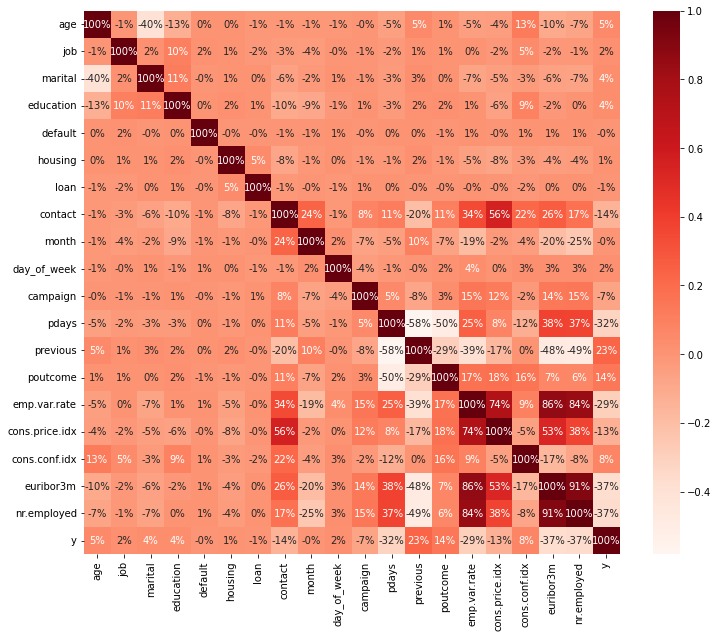

In [14]:
#visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds,fmt=".0%")
plt.show()

In [15]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
 
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [16]:
#set train set
# drop target
x_dummies =  pd.get_dummies(df.drop('y', axis = 1)).values
#select the target
target = df['y']

In [17]:
x_dummies.shape

(30488, 19)

In [18]:
x_dummies

array([[ 39,   3,   1, ...,  16, 285,   8],
       [ 20,   7,   1, ...,  16, 285,   8],
       [ 23,   0,   1, ...,  16, 285,   8],
       ...,
       [ 39,   5,   1, ...,   0, 170,   0],
       [ 27,   9,   1, ...,   0, 170,   0],
       [ 57,   5,   1, ...,   0, 170,   0]], dtype=int16)

In [19]:
target.shape

(30488,)

In [20]:
target

0        0
1        0
2        0
3        0
4        0
        ..
30483    1
30484    0
30485    0
30486    1
30487    0
Name: y, Length: 30488, dtype: int8

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
def classify(x, y):
    print(f"class 0: {y.shape[0] - np.sum(y)}")
    print(f"class 1: {np.sum(y)}")
 # Defines the model to be used
    model = RandomForestClassifier()
   
    
    avg_accuracy = []
    avg_precision = []
    avg_recall = []
    avg_f1score = []
    
 # Defines Stratified K-fold in order to keep
 # the class balance for each fold
    st_k_fold = StratifiedKFold(n_splits=10)
    for train_idx, test_idx in st_k_fold.split(x, y): 
    # Training fold
        x_train = x[train_idx]
        y_train = y[train_idx]
         
        # Testing fold
        x_test = x[test_idx]
        y_test = y[test_idx]
        
 
        # Train
        model.fit(x_train, y_train)
        #preduct
        test_predictions = model.predict(x_test)

        # Get metrics
        accuracy = accuracy_score(y_test, test_predictions )
        precision = precision_score(y_test, test_predictions )
        recall = recall_score(y_test, test_predictions )
        f1score = f1_score(y_test, test_predictions )
        sns.heatmap(pd.DataFrame(confusion_matrix(y_test,test_predictions)),cmap="viridis",annot=True,fmt="g")
        plt.show()
        # Save metrics
        avg_accuracy.append(accuracy)
        avg_precision.append(precision)
        avg_recall.append(recall)
        avg_f1score.append(f1score)
        print(f"accuracy: {np.mean(avg_accuracy)}")
        print(f"precision: {np.mean(avg_precision)}")
        print(f"recall: {np.mean(avg_recall)}")
        print(f"f1-score: {np.mean(avg_f1score)}")

        

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
 
# Applies random forest without fixing the class imbalance problem.
def dummy_random_forest():
    classify(x_dummies,target)
# Applies Random Undersampling
def under_sampler():
    rus = RandomUnderSampler()
    x, y = rus.fit_resample(x_dummies, target)
    classify(x, y)
# Applies Random Undersampling
def over_sampler():
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x_dummies, target)
    classify(x, y)
# Applies SMOTE
def smote():
    smote= SMOTE()
    x, y = smote.fit_resample(x_dummies, target)
    classify(x, y)
    

class 0: 26629
class 1: 3859


/Users/liu/anaconda3/envs/ce802/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


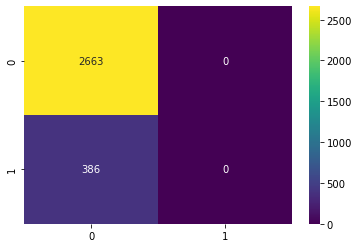

accuracy: 0.8734011151197114
precision: 0.0
recall: 0.0
f1-score: 0.0


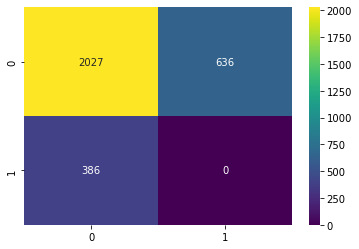

accuracy: 0.7691046244670383
precision: 0.0
recall: 0.0
f1-score: 0.0


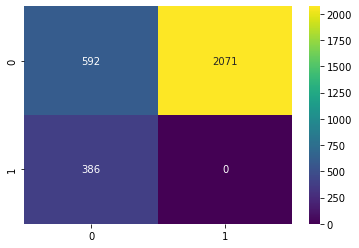

accuracy: 0.5774570897562042
precision: 0.0
recall: 0.0
f1-score: 0.0


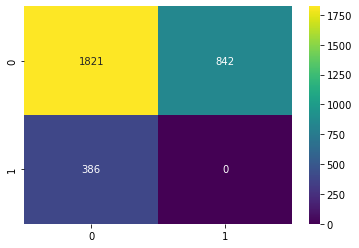

accuracy: 0.5824040669071826
precision: 0.0
recall: 0.0
f1-score: 0.0


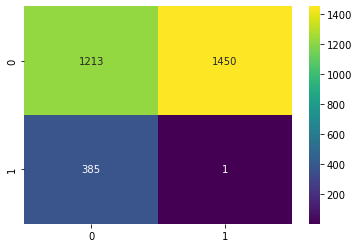

accuracy: 0.5455559199737618
precision: 0.00013783597518952445
recall: 0.0005181347150259067
f1-score: 0.0002177463255307567


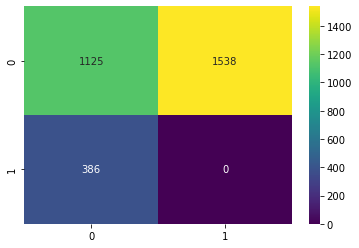

accuracy: 0.5161255056302613
precision: 0.00011486331265793706
recall: 0.00043177892918825565
f1-score: 0.00018145527127563058


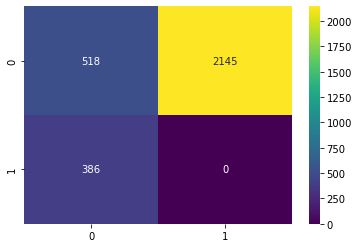

accuracy: 0.4666635430820409
precision: 9.845426799251748e-05
recall: 0.00037009622501850485
f1-score: 0.0001555330896648262


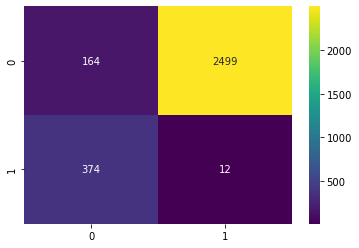

accuracy: 0.41554608068219084
precision: 0.0006835190496069534
recall: 0.0042098445595854924
f1-score: 0.0011716454748581728


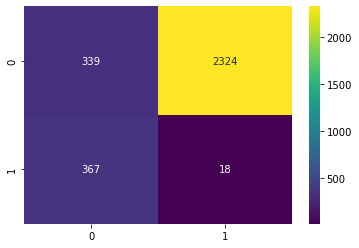

accuracy: 0.3823882921899439
precision: 0.0014615434535267045
recall: 0.008936889247770077
f1-score: 0.0025082759923198425


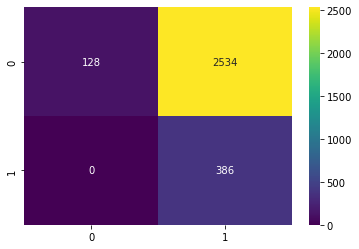

accuracy: 0.361012980031317
precision: 0.014534567190365815
recall: 0.10804320032299305
f1-score: 0.025608930546747878


In [31]:
dummy_random_forest()

class 0: 3859
class 1: 3859


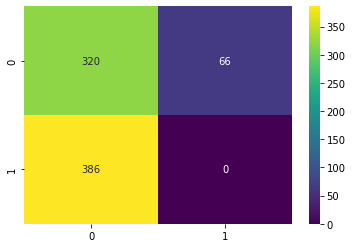

accuracy: 0.41450777202072536
precision: 0.0
recall: 0.0
f1-score: 0.0


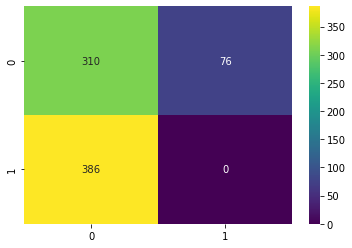

accuracy: 0.40803108808290156
precision: 0.0
recall: 0.0
f1-score: 0.0


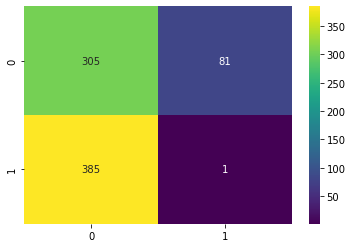

accuracy: 0.4041450777202073
precision: 0.0040650406504065045
recall: 0.0008635578583765113
f1-score: 0.0014245014245014246


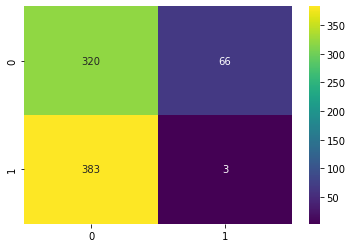

accuracy: 0.40770725388601037
precision: 0.013918345705196181
recall: 0.0025906735751295338
f1-score: 0.004365079365079365


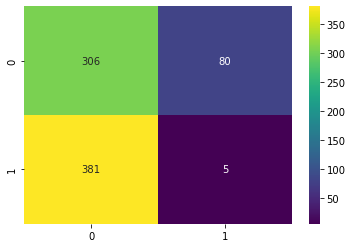

accuracy: 0.4067357512953368
precision: 0.022899382446509887
recall: 0.00466321243523316
f1-score: 0.007738347993125063


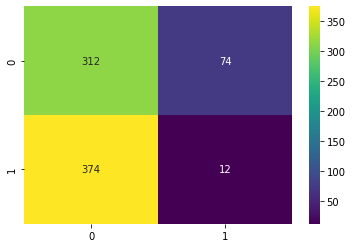

accuracy: 0.4088946459412781
precision: 0.04233863265891328
recall: 0.009067357512953367
f1-score: 0.01492319959879066


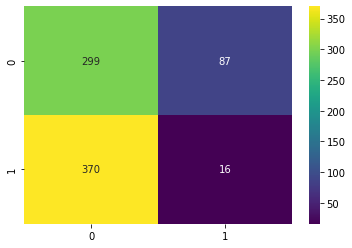

accuracy: 0.4087712805329386
precision: 0.05848165739696034
recall: 0.01369356032568468
f1-score: 0.022139838627768565


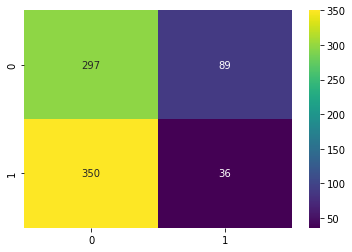

accuracy: 0.4115932642487047
precision: 0.0871714502223403
recall: 0.023639896373056996
f1-score: 0.03698488326113702


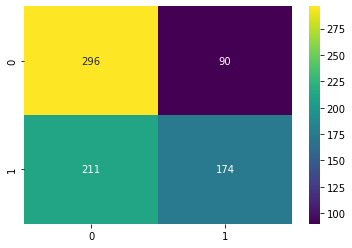

accuracy: 0.43359378208474
precision: 0.1507180567632924
recall: 0.07122969143694531
f1-score: 0.09245429102753354


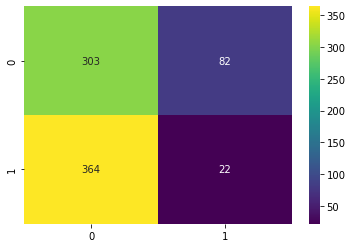

accuracy: 0.4323874518658898
precision: 0.1568000972408093
recall: 0.06980620415853575
f1-score: 0.09218845376151488


In [32]:
under_sampler()

class 0: 26629
class 1: 26629


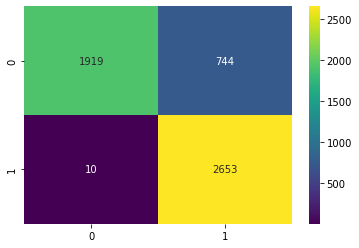

accuracy: 0.8584303417198648
precision: 0.7809832204886664
recall: 0.9962448366503943
f1-score: 0.8755775577557756


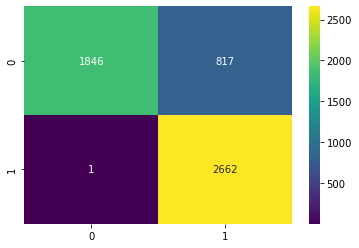

accuracy: 0.8524220803604956
precision: 0.7730728117390155
recall: 0.9979346601577168
f1-score: 0.8711980918052731


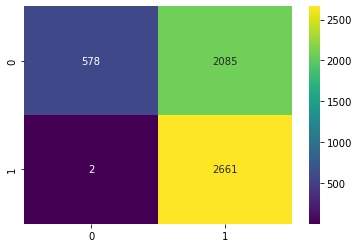

accuracy: 0.7709976217298786
precision: 0.7022761012099127
recall: 0.9983727625485042
f1-score: 0.8202372485882276


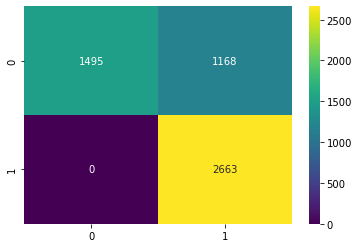

accuracy: 0.7734228313931657
precision: 0.700486767893861
recall: 0.9987795719113781
f1-score: 0.8202133537494553


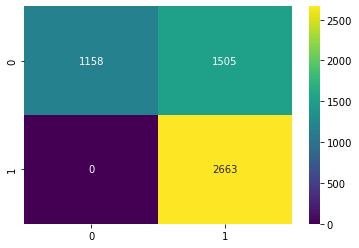

accuracy: 0.7622230567029666
precision: 0.6881725237200792
recall: 0.9990236575291025
f1-score: 0.8121068563270419


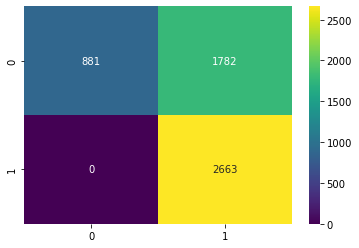

accuracy: 0.7460883715108274
precision: 0.6733271218477226
recall: 0.9991863812742521
f1-score: 0.8016384748138968


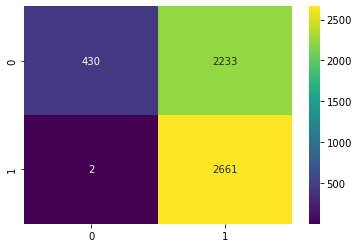

accuracy: 0.7224129606780753
precision: 0.6548128205364157
recall: 0.9991953221393702
f1-score: 0.7877255094616479


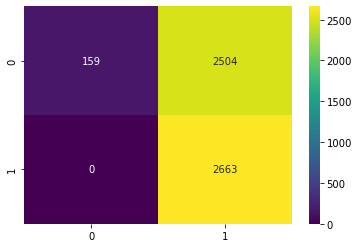

accuracy: 0.6983430341719865
precision: 0.637384480984653
recall: 0.9992959068719489
f1-score: 0.7742853635631054


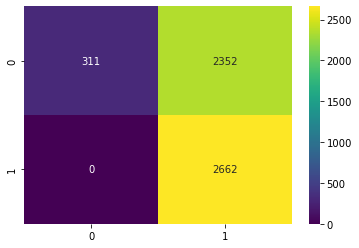

accuracy: 0.6827837925034247
precision: 0.625554365582068
recall: 0.9993741394417324
f1-score: 0.7653192577975099


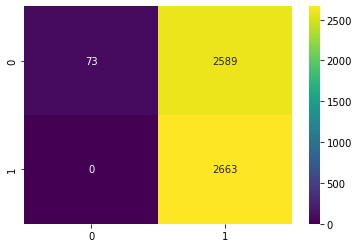

accuracy: 0.665885694943223
precision: 0.6137034225501369
recall: 0.9994367254975591
f1-score: 0.7560772877979232


In [24]:
over_sampler()

class 0: 26629
class 1: 26629


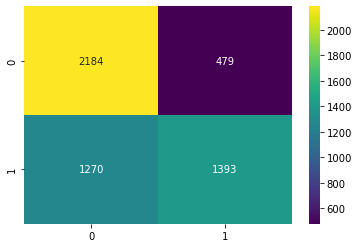

accuracy: 0.6716109650769808
precision: 0.7441239316239316
recall: 0.5230942546000751
f1-score: 0.6143329658213893


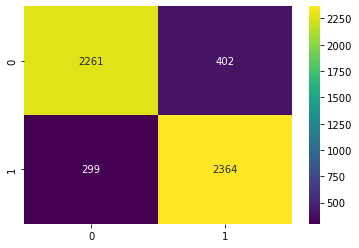

accuracy: 0.7699962448366504
precision: 0.7993938530137012
recall: 0.7054074352234322
f1-score: 0.7426057903337928


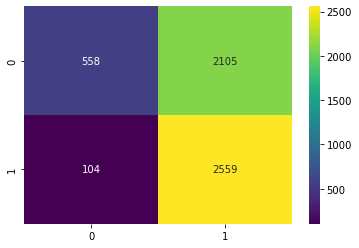

accuracy: 0.7084115659031168
precision: 0.71581945832703
recall: 0.790587057203655
f1-score: 0.727907977414649


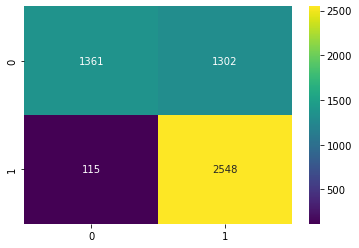

accuracy: 0.7147953435974466
precision: 0.702319139199818
recall: 0.8321441982726248
f1-score: 0.7415397654961164


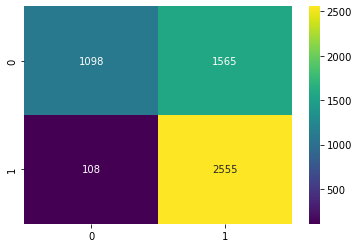

accuracy: 0.7090123920390538
precision: 0.6858844375734467
recall: 0.8576042057829515
f1-score: 0.7439026070305361


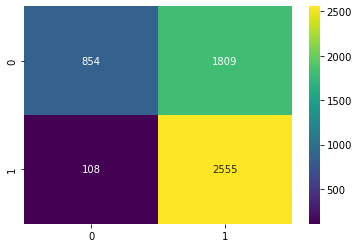

accuracy: 0.6975215921892602
precision: 0.6691490386439279
recall: 0.8745775441231692
f1-score: 0.7411180232915394


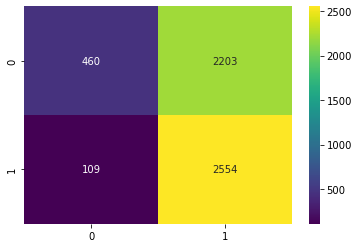

accuracy: 0.6787189528458774
precision: 0.6502553188076216
recall: 0.8866477120326162
f1-score: 0.7335882633218971


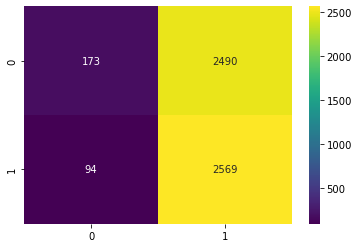

accuracy: 0.6582331956440105
precision: 0.6324493873525969
recall: 0.8964044310927525
f1-score: 0.7250611885781182


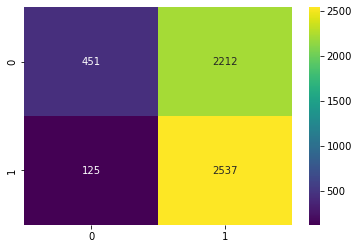

accuracy: 0.6474435917461627
precision: 0.6215347587632452
recall: 0.9026975859650747
f1-score: 0.7205719388359566


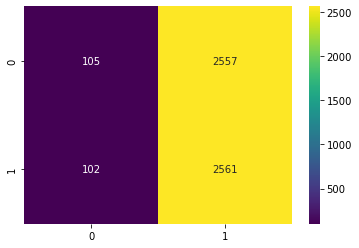

accuracy: 0.632764960271077
precision: 0.6094203606516725
recall: 0.9085975607519693
f1-score: 0.714341759474916


In [34]:
smote()

In [35]:

clf = RandomForestClassifier()
ros = RandomOverSampler()
x, y = ros.fit_resample(x_dummies, target)
#x1, y2 = ros.fit_resample(select_dummies, target)
clf.fit(x,y)

RandomForestClassifier()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50,stratify=y) 
#check
print(" x_train:",len(x_train),'\n',"x_test:",len(x_test),'\n',"y_train:",len(y_train),'\n',"y_test:",len(y_test))

 x_train: 42606 
 x_test: 10652 
 y_train: 42606 
 y_test: 10652


In [37]:
#param1={
#        'max_depth':[i for i in range(1,11)]
#        ,'n_estimators':[150,200,250]
#        ,'max_features': ['auto', 'sqrt', 'log2']
#}
#gs1=GridSearchCV(clf,param_grid=param1,n_jobs=-1,scoring='f1',cv=10)
#gs1.fit(x_train,y_train)

In [38]:
#gs1.fit(x_train,y_train)
#get the best parameter and score
#gs1.best_params_,gs1.best_score_

#result = ({'max_depth': 10, 'max_features': 'auto', 'n_estimators': 250}, 0.7546099431694433)
#clf_gsl = RandomForestClassifier(max_depth=10,max_features='auto', n_estimators = 250)
#clf_gsl.fit(x_train,y_train)

In [39]:
# feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [40]:
feat_names = df.drop('y', axis = 1).columns

In [41]:
feat_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [42]:
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

Feature ranking:
1. age (0.179910)
2. euribor3m (0.140633)
3. campaign (0.088975)
4. job (0.081428)
5. nr.employed (0.076393)
6. education (0.068131)
7. emp.var.rate (0.061718)
8. day_of_week (0.057137)
9. marital (0.039957)
10. housing (0.031320)
11. cons.conf.idx (0.031101)
12. cons.price.idx (0.029227)
13. pdays (0.026806)
14. loan (0.022384)
15. month (0.017892)
16. contact (0.017595)
17. poutcome (0.017376)
18. previous (0.012011)
19. default (0.000002)


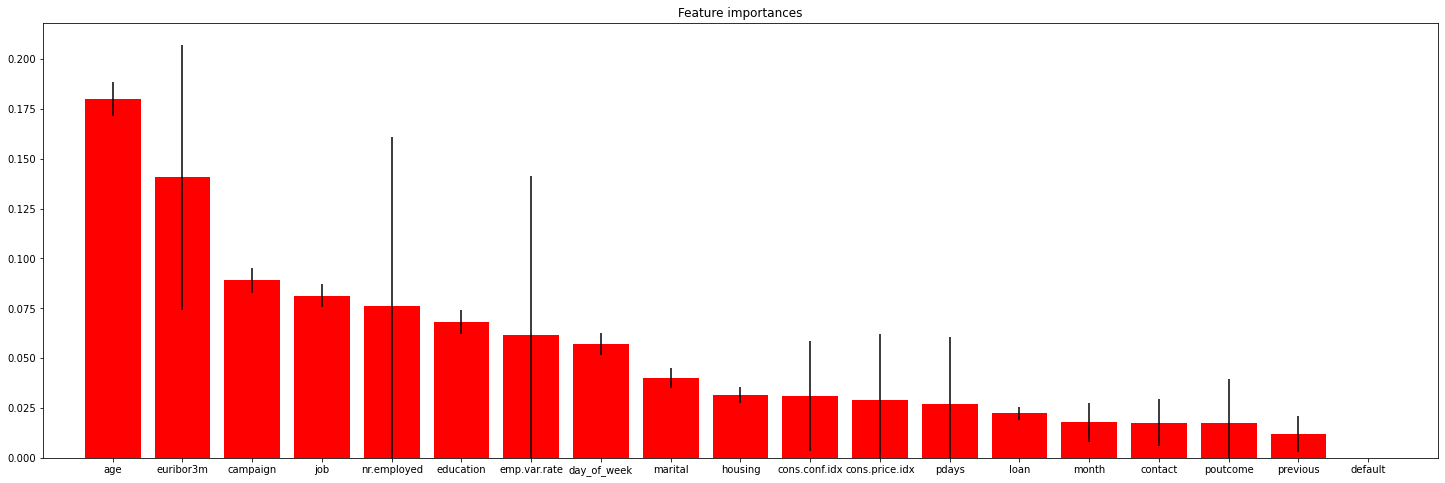

In [43]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x_dummies .shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_dummies .shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, x_dummies .shape[1]])
plt.ylim([0, None])

fig.set_size_inches(25, 8)

In [27]:
select_dummies = pd.get_dummies(df[["age","job","marital","housing","day_of_week","euribor3m","nr.employed","campaign","emp.var.rate"]]).values


In [28]:
#train the model again with feature selection
# Applies random forest without fixing the class imbalance problem.
def select_dummy_random_forest():
    classify(select_dummies,target)
# Applies Random Undersampling
def select_under_sampler():
    rus = RandomUnderSampler()
    x, y = rus.fit_resample(select_dummies, target)
    classify(x, y)
# Applies Random Undersampling
def select_over_sampler():
    ros = RandomOverSampler()
    x, y = ros.fit_resample(select_dummies, target)
    classify(x, y)
# Applies SMOTE
def select_smote():
    smote= SMOTE()
    x, y = smote.fit_resample(select_dummies, target)
    classify(x, y)

class 0: 26629
class 1: 3859


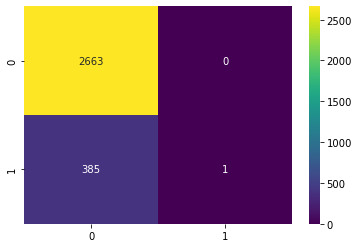

accuracy: 0.8737290915054116
precision: 1.0
recall: 0.0025906735751295338
f1-score: 0.00516795865633075


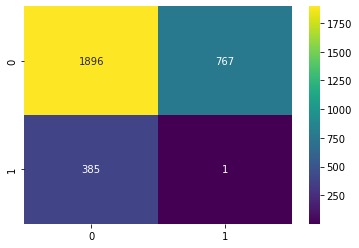

accuracy: 0.7479501475893735
precision: 0.5006510416666666
recall: 0.0025906735751295338
f1-score: 0.0034505304546818393


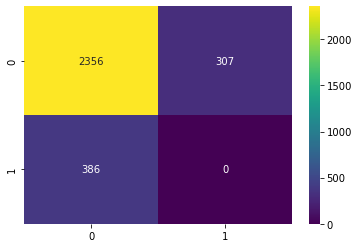

accuracy: 0.7562042199628293
precision: 0.3337673611111111
recall: 0.0017271157167530226
f1-score: 0.0023003536364545594


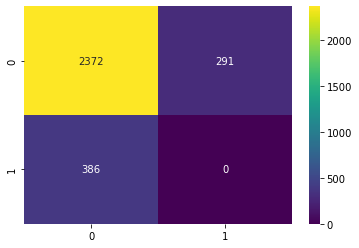

accuracy: 0.7616431616923581
precision: 0.2503255208333333
recall: 0.0012953367875647669
f1-score: 0.0017252652273409197


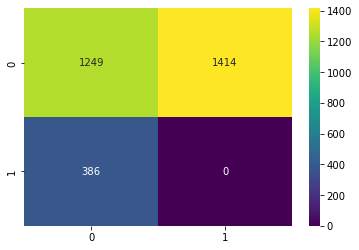

accuracy: 0.6912430305018039
precision: 0.20026041666666666
recall: 0.0010362694300518134
f1-score: 0.0013802121818727356


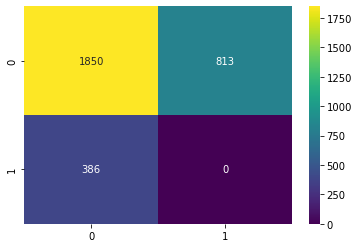

accuracy: 0.677161911009074
precision: 0.16688368055555555
recall: 0.0008635578583765113
f1-score: 0.0011501768182272797


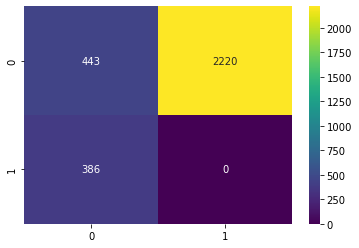

accuracy: 0.6011807149885209
precision: 0.14304315476190474
recall: 0.0007401924500370097
f1-score: 0.0009858658441948113


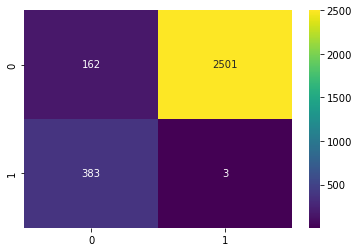

accuracy: 0.5327976385700229
precision: 0.12531252080005323
recall: 0.0016191709844559587
f1-score: 0.001122148184604716


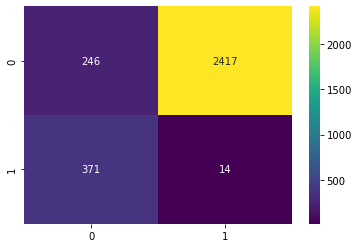

accuracy: 0.4830758828700583
precision: 0.11202879037064926
recall: 0.005479667137698226
f1-score: 0.00210226303277995


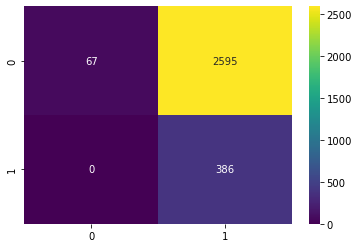

accuracy: 0.4496304993074619
precision: 0.11377458627487921
recall: 0.10493170042392841
f1-score: 0.024820459657924888


In [29]:
select_dummy_random_forest()

class 0: 3859
class 1: 3859


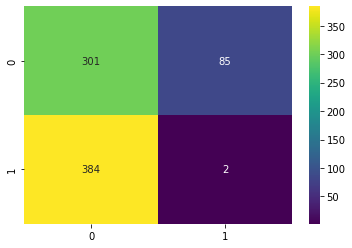

accuracy: 0.39248704663212436
precision: 0.022988505747126436
recall: 0.0051813471502590676
f1-score: 0.008456659619450317


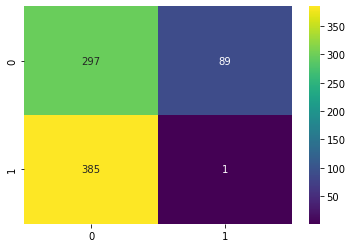

accuracy: 0.38924870466321243
precision: 0.017049808429118775
recall: 0.0038860103626943004
f1-score: 0.006329170145859613


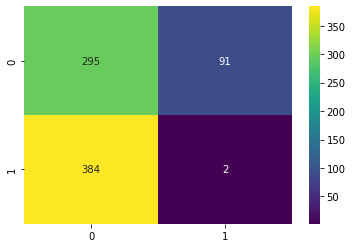

accuracy: 0.3877374784110535
precision: 0.01853499773410786
recall: 0.004317789291882556
f1-score: 0.007003023660218169


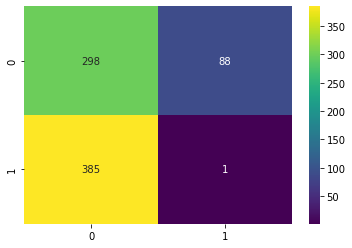

accuracy: 0.38762953367875647
precision: 0.016710237064625835
recall: 0.003886010362694301
f1-score: 0.006304899324110995


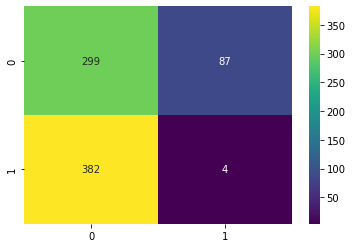

accuracy: 0.38860103626943004
precision: 0.022159398442909463
recall: 0.0051813471502590676
f1-score: 0.00839821715320913


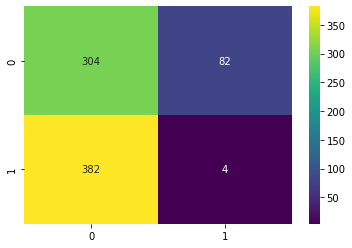

accuracy: 0.39032815198618304
precision: 0.026218103353587343
recall: 0.006044905008635579
f1-score: 0.009823373051403088


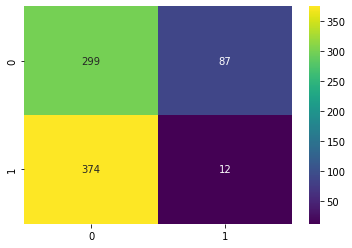

accuracy: 0.39211695040710587
precision: 0.03978867733337789
recall: 0.009622501850481125
f1-score: 0.015489253484413252


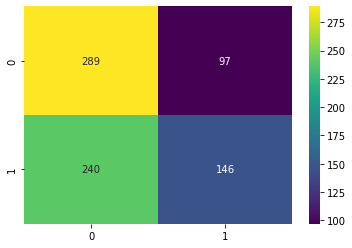

accuracy: 0.41353626943005184
precision: 0.10991797332514189
recall: 0.05569948186528498
f1-score: 0.07158171365100786


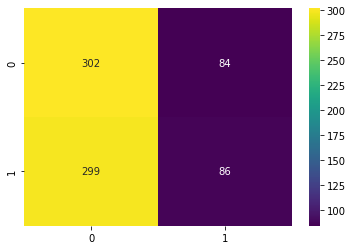

accuracy: 0.4235036330659403
precision: 0.1539140155047013
recall: 0.0743302753665448
f1-score: 0.09806262434644143


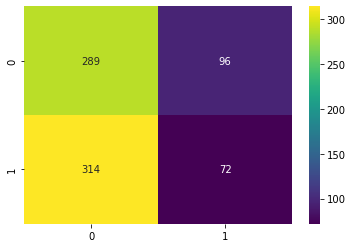

accuracy: 0.42797557844935924
precision: 0.18137975681137403
recall: 0.08555009757082296
f1-score: 0.11424914169519078


In [47]:
select_under_sampler()

class 0: 26629
class 1: 26629


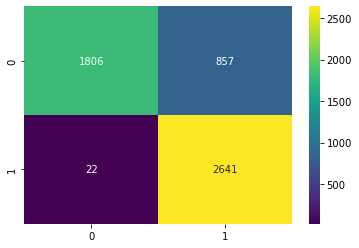

accuracy: 0.8349605707848291
precision: 0.7550028587764437
recall: 0.9917386406308675
f1-score: 0.8573283557863983


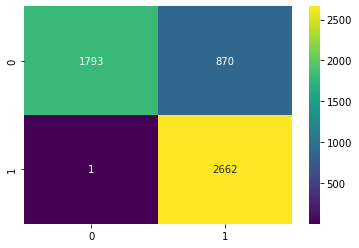

accuracy: 0.8357116034547503
precision: 0.7543417464890145
recall: 0.9956815621479534
f1-score: 0.8583655499674525


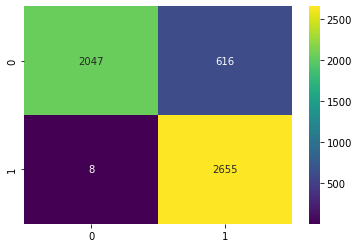

accuracy: 0.8514207034672675
precision: 0.7734539595975881
recall: 0.9961196645387408
f1-score: 0.8705247919904352


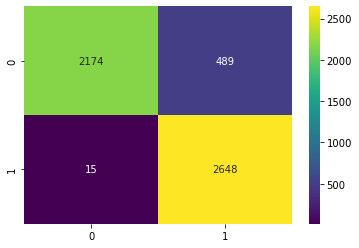

accuracy: 0.8649079984979346
precision: 0.7911201158569415
recall: 0.9956815621479534
f1-score: 0.881169456061792


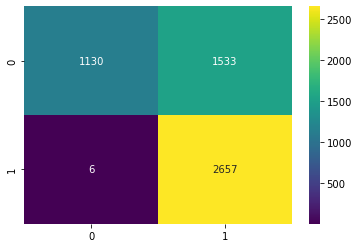

accuracy: 0.8341344348479158
precision: 0.7597218683418778
recall: 0.99609463011641
f1-score: 0.8600209289235616


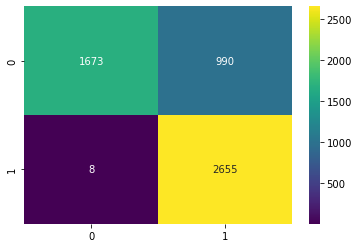

accuracy: 0.8305482538490424
precision: 0.7545007339062973
recall: 0.9962448366503942
f1-score: 0.8569821416785334


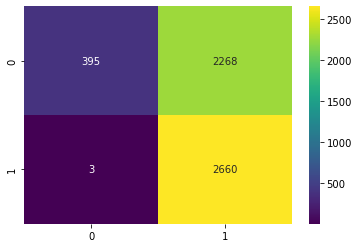

accuracy: 0.7938415321066465
precision: 0.7238253043872159
recall: 0.9966203529853548
f1-score: 0.8346746828930968


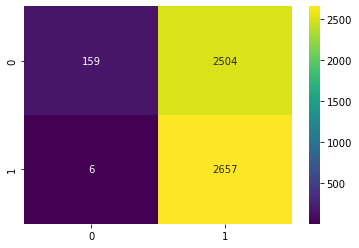

accuracy: 0.7607022155463763
precision: 0.6976999799359851
recall: 0.996761171610965
f1-score: 0.8152393761613166


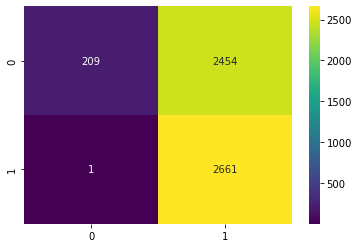

accuracy: 0.7360649845023606
precision: 0.677981604843717
recall: 0.9970793017208077
f1-score: 0.8006933983005796


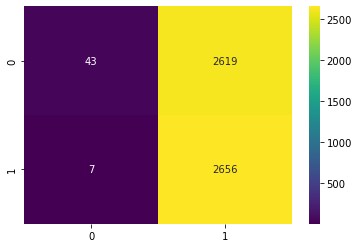

accuracy: 0.7131439320615142
precision: 0.6605341552598192
recall: 0.9971085101142545
f1-score: 0.7875426777700933


In [30]:
select_over_sampler()

class 0: 26629
class 1: 26629


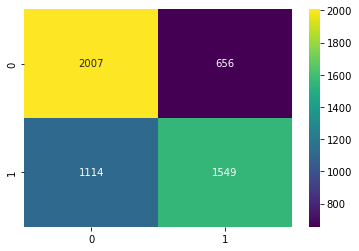

accuracy: 0.6676680435598948
precision: 0.7024943310657596
recall: 0.5816748028539241
f1-score: 0.6364009860312244


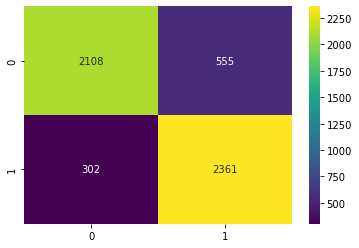

accuracy: 0.7533796470146451
precision: 0.7560825564793818
recall: 0.734134434847916
f1-score: 0.7413946138257932


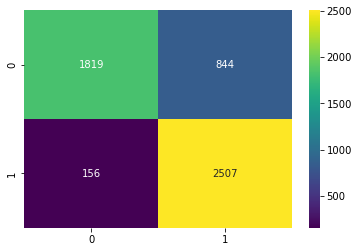

accuracy: 0.7730003755163349
precision: 0.7534333326892287
recall: 0.8032294404806609
f1-score: 0.7721701815262522


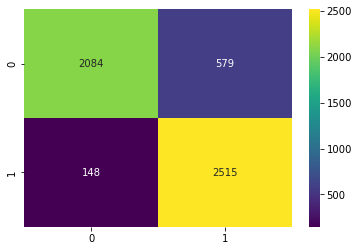

accuracy: 0.7956252346977093
precision: 0.768290901262235
recall: 0.8385279759669546
f1-score: 0.7975573738553023


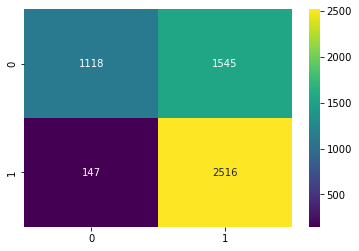

accuracy: 0.7729628238828388
precision: 0.7385430879144913
recall: 0.8597822005257229
f1-score: 0.7877187128855506


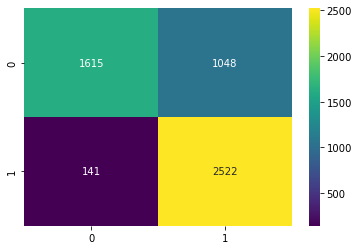

accuracy: 0.7735949430466892
precision: 0.7331930027672114
recall: 0.8743271998998622
f1-score: 0.7913057833862288


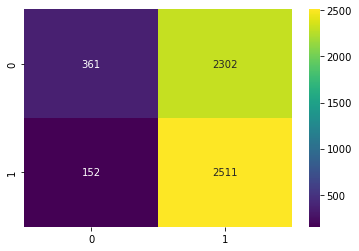

accuracy: 0.7401158736119307
precision: 0.7029814352174626
recall: 0.8841263880693094
f1-score: 0.7742263284333235


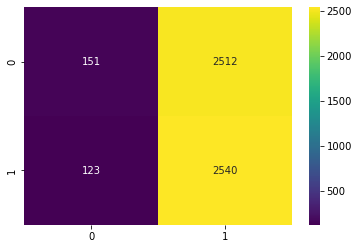

accuracy: 0.7107585429966203
precision: 0.6779551532816297
recall: 0.8928370259106271
f1-score: 0.7597552311575119


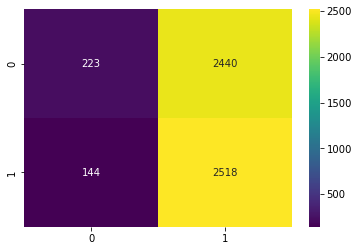

accuracy: 0.6889789031122802
precision: 0.6590563668092546
recall: 0.8987335046244558
f1-score: 0.7487704708568377


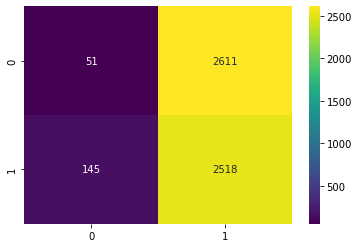

accuracy: 0.6683251442564512
precision: 0.6422441206527979
recall: 0.903415167305082
f1-score: 0.7385238139148911


In [31]:
select_smote()